### **Feed Forward Neural Network from scratch on CIFAR10 dataset**

##### The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 50,000 training images and 10,000 test images. Each image has 3 color channels (RGB)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 10/100, Loss: 2.2479
Epoch 20/100, Loss: 1.4101
Epoch 30/100, Loss: 1.8008
Epoch 40/100, Loss: 1.1503
Epoch 50/100, Loss: 1.3840
Epoch 60/100, Loss: 1.2616
Epoch 70/100, Loss: 1.5107
Epoch 80/100, Loss: 0.9036
Epoch 90/100, Loss: 1.1233
Epoch 100/100, Loss: 1.0032
Test Accuracy: 51.87%


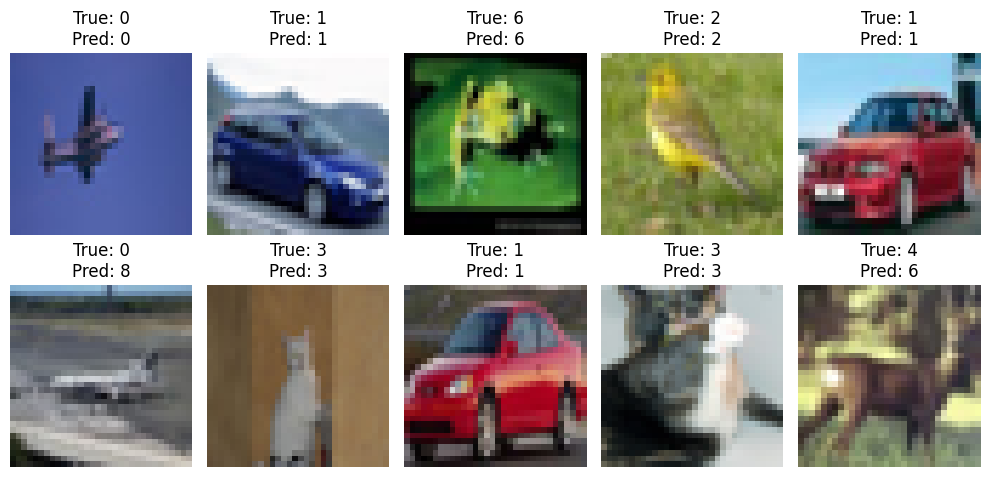

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Activation functions
def relu(z):
    return np.maximum(0, z)  # ReLU activation

def relu_derivative(a):
    return (a > 0).astype(float)  # Derivative of ReLU

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)  # Normalize

# Dense layer forward
def dense_forward(x, w, b, activation="relu"):
    z = np.dot(w, x) + b  # Linear transformation
    if activation == "relu":
        a = relu(z)
    elif activation == "softmax":
        a = softmax(z)
    else:
        raise ValueError("Unsupported activation function.")
    return z, a

# Loading CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

# Normalizing pixel values to [0, 1]
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Flatten and normalize training data
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0  # Flatten and normalize testing data

# One-hot encoding the labels
Y_train_one_hot = np.eye(10)[Y_train]  # One-hot encoding for training labels
Y_test_one_hot = np.eye(10)[Y_test]  # One-hot encoding for testing labels

# Hyperparameters
config = {
    "layers": [3072, 128, 64, 10],  # CIFAR-10 (3072 input features for 32x32x3 images)
    "epochs": 100,
    "batch_size": 64,
    "learning_rate": 0.01,
}

# Initializing weights and biases
s = config["layers"]
w = {l: np.random.randn(s[l], s[l - 1]) * 0.01 for l in range(1, len(s))}
b = {l: np.zeros((s[l], 1)) for l in range(1, len(s))}

# Training loop
for epoch in range(config["epochs"]):

    # Shuffling the training data
    shuffled_indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[shuffled_indices]
    Y_train_shuffled = Y_train_one_hot[shuffled_indices]

    for j in range(0, X_train.shape[0], config["batch_size"]):
        batch_X = X_train_shuffled[j:j + config["batch_size"], :].T
        batch_Y = Y_train_shuffled[j:j + config["batch_size"], :].T

        # Forward propagation
        a = {0: batch_X}
        z = {}
        for l in range(1, len(s)):
            activation = "softmax" if l == len(s) - 1 else "relu"
            z[l], a[l] = dense_forward(a[l - 1], w[l], b[l], activation)

        # Backward propagation
        delta = {len(s) - 1: a[len(s) - 1] - batch_Y}
        dw = {}
        db = {}
        for l in range(len(s) - 1, 0, -1):
            dw[l] = np.dot(delta[l], a[l - 1].T) / config["batch_size"]
            db[l] = np.sum(delta[l], axis=1, keepdims=True) / config["batch_size"]
            if l > 1:
                delta[l - 1] = np.dot(w[l].T, delta[l]) * relu_derivative(a[l - 1])

        # Updating weights and biases
        for l in range(1, len(s)):
            w[l] -= config["learning_rate"] * dw[l]
            b[l] -= config["learning_rate"] * db[l]

    # Computing loss every 10 epochs
    y_hat = a[len(s) - 1]
    loss = -np.mean(np.sum(batch_Y * np.log(y_hat + 1e-8), axis=0))
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{config['epochs']}, Loss: {loss:.4f}")

# Prediction function
def predict(X, w, b, s):
    a = X
    for l in range(1, len(s)):
        activation = "softmax" if l == len(s) - 1 else "relu"
        _, a = dense_forward(a, w[l], b[l], activation)
    return np.argmax(a, axis=0)

# Evaluating model
test_predictions = predict(X_test.T, w, b, s)
accuracy = np.mean(test_predictions == Y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Displaying sample predictions vs actual labels with images
sample_indices = np.random.choice(X_test.shape[0], 10, replace=False)
plt.figure(figsize=(10, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3))  # Reshaping back to 32x32x3 for visualization
    plt.title(f"True: {Y_test[idx]}\nPred: {test_predictions[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Epoch 10/100, Loss: 1.8945
Epoch 20/100, Loss: 1.7614
Epoch 30/100, Loss: 1.3520
Epoch 40/100, Loss: 0.9247
Epoch 50/100, Loss: 1.1685
Epoch 60/100, Loss: 1.3313
Epoch 70/100, Loss: 0.7479
Epoch 80/100, Loss: 1.2113
Epoch 90/100, Loss: 0.7413
Epoch 100/100, Loss: 0.7553
Test Accuracy: 51.21%


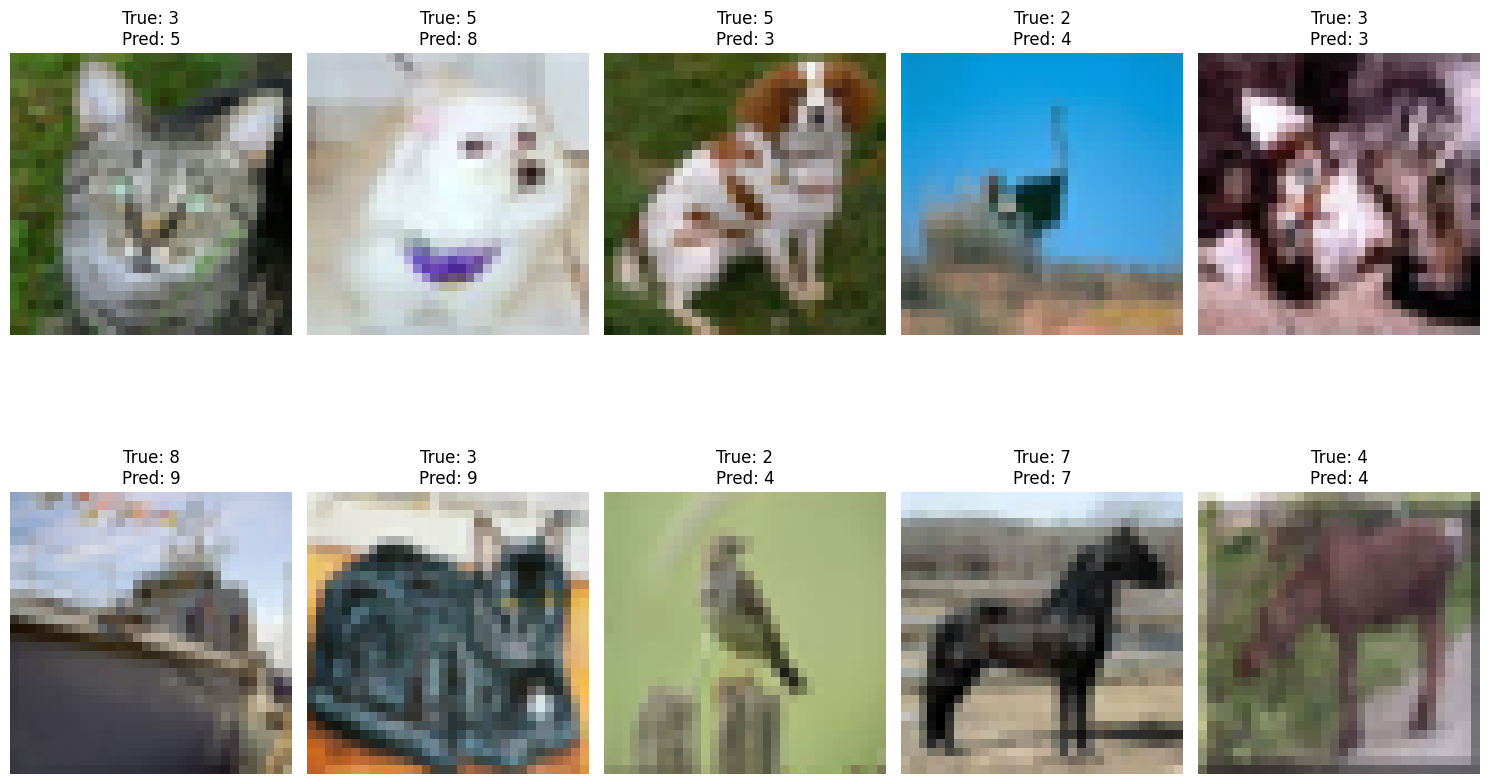

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Activation functions
def relu(z):
    return np.maximum(0, z)  # ReLU activation

def relu_derivative(a):
    return (a > 0).astype(float)  # Derivative of ReLU

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)  # Normalize

# Dense layer forward
def dense_forward(x, w, b, activation="relu"):
    z = np.dot(w, x) + b  # Linear transformation
    if activation == "relu":
        a = relu(z)
    elif activation == "softmax":
        a = softmax(z)
    else:
        raise ValueError("Unsupported activation function.")
    return z, a

# Loading CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

# Normalizing pixel values to [0, 1]
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Flatten and normalize training data
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0  # Flatten and normalize testing data

# One-hot encoding the labels
Y_train_one_hot = np.eye(10)[Y_train]  # One-hot encoding for training labels
Y_test_one_hot = np.eye(10)[Y_test]  # One-hot encoding for testing labels

# Hyperparameters
config = {
    "layers": [3072, 128, 64, 10],  # CIFAR-10 (3072 input features for 32x32x3 images)
    "epochs": 100,
    "batch_size": 20,
    "learning_rate": 0.01,
}

# Initializing weights and biases
s = config["layers"]
w = {l: np.random.randn(s[l], s[l - 1]) * 0.01 for l in range(1, len(s))}
b = {l: np.zeros((s[l], 1)) for l in range(1, len(s))}

# Training loop
for epoch in range(config["epochs"]):

    # Shuffling the training data
    shuffled_indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[shuffled_indices]
    Y_train_shuffled = Y_train_one_hot[shuffled_indices]

    for j in range(0, X_train.shape[0], config["batch_size"]):
        batch_X = X_train_shuffled[j:j + config["batch_size"], :].T
        batch_Y = Y_train_shuffled[j:j + config["batch_size"], :].T

        # Forward propagation
        a = {0: batch_X}
        z = {}
        for l in range(1, len(s)):
            activation = "softmax" if l == len(s) - 1 else "relu"
            z[l], a[l] = dense_forward(a[l - 1], w[l], b[l], activation)

        # Backward propagation
        delta = {len(s) - 1: a[len(s) - 1] - batch_Y}
        dw = {}
        db = {}
        for l in range(len(s) - 1, 0, -1):
            dw[l] = np.dot(delta[l], a[l - 1].T) / config["batch_size"]
            db[l] = np.sum(delta[l], axis=1, keepdims=True) / config["batch_size"]
            if l > 1:
                delta[l - 1] = np.dot(w[l].T, delta[l]) * relu_derivative(a[l - 1])

        # Updating weights and biases
        for l in range(1, len(s)):
            w[l] -= config["learning_rate"] * dw[l]
            b[l] -= config["learning_rate"] * db[l]

    # Computing loss every 10 epochs
    y_hat = a[len(s) - 1]
    loss = -np.mean(np.sum(batch_Y * np.log(y_hat + 1e-8), axis=0))
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{config['epochs']}, Loss: {loss:.4f}")

# Prediction function
def predict(X, w, b, s):
    a = X
    for l in range(1, len(s)):
        activation = "softmax" if l == len(s) - 1 else "relu"
        _, a = dense_forward(a, w[l], b[l], activation)
    return np.argmax(a, axis=0)

# Evaluating model
test_predictions = predict(X_test.T, w, b, s)
accuracy = np.mean(test_predictions == Y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Displaying sample predictions vs actual labels with images
sample_indices = np.random.choice(X_test.shape[0], 10, replace=False)
plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3))  # Reshaping back to 32x32x3 for visualization
    plt.title(f"True: {Y_test[idx]}\nPred: {test_predictions[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
